# Interpolate Trace of Inverse

 This interactive tutorial demonstrates the usage of [`TraceInv.InterpolateTraceOfInverse`](https://ameli.github.io/TraceInv/InterpolateTraceOfInverse.html) module and comparison of the methods therein. For two invertible matrices $\mathbf{A}$ and $\mathbf{B}$, the goal is to compute and/or interpolate the function
 
$$t \mapsto \mathrm{trace} (\mathbf{A} +  t \mathbf{B})^{-1},$$
    
for a fixed parameter $t$ or in an interval $t \in [a,b]$. 

* [Generate Sample Matrices](http://localhost:8888/notebooks/InterpolateTraceOfInverse.ipynb#Generate-Sample-Matrices)
* [Compute Trace Without Interpolation](http://localhost:8888/notebooks/InterpolateTraceOfInverse.ipynb#Compute-Trace-without-Interpolation)
* [Interpolate Trace](http://localhost:8888/notebooks/InterpolateTraceOfInverse.ipynb#Interpolate-Trace)

## Generate Sample Matrices

We demonstrate the examples that follows on symmetric and positive-definite matrices. We generate two sample correlation matrices of the size $(20^2,20^2)$ using [`TraceInv.GenerateMatrix`](https://ameli.github.io/TraceInv/GenerateMatrix.html) as shown below.

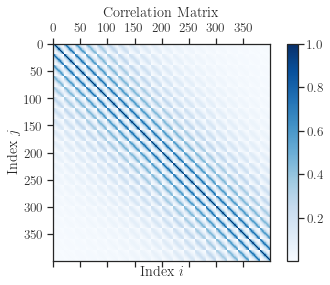

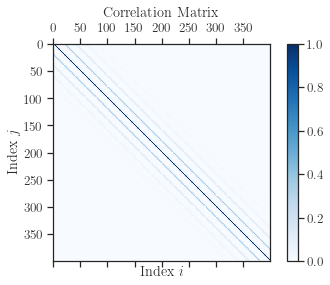

In [1]:
from TraceInv import GenerateMatrix

# Generate symmetric and positive-definite matrices
A = GenerateMatrix(NumPoints=20,DecorrelationScale=0.20,Plot=True)    # See the first plot below
B = GenerateMatrix(NumPoints=20,DecorrelationScale=0.05,Plot=True)    # See the second plot below

To make matrices $\mathbf{A}$ and $\mathbf{B}$ to be distrinct, we used to different values for the argument ``DecorrelationScale``, which sets the correlation of the elements of the matrix. A matrix with smaller decorrelation scale tends to be closer to the identity matrix (such as the matrix $\mathbf{B}$ in the above).

## Compute Trace without Interpolation

The module [`TraceInv.ComputeTraceOfInverse`](https://ameli.github.io/TraceInv/ComputeTraceOfInverse.html) computes the trace of inverse of a matrix, here $\mathbf{A} + t \mathbf{B}$.

In [36]:
import numpy
from TraceInv import ComputeTraceOfInverse

t = 1
Trace = ComputeTraceOfInverse(A+t*B)
print(Trace)

440.65932611710997


Now, lets compute the trace for a large number of parameters $t$ (this is done in applications). We also measure the elapsed time.

In [40]:
# Specify inquiry points t
a,b,N = -3,3,1000
t = numpy.logspace(a,b,N)

# Compute trace of A+tB (NOTE: this may take a few seconds)
%time Trace = [ComputeTraceOfInverse(A+t[i]*B) for i in range(t.size)]

CPU times: user 12 s, sys: 7.97 ms, total: 12 s
Wall time: 12 s


We plot the results below.

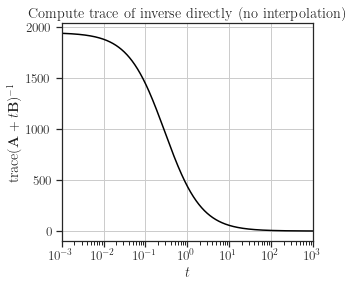

In [44]:
# Plot results
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(4.5,4))
ax.semilogx(t,Trace,color='black')
ax.set_xlim([t[0],t[-1]])
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'trace$(\mathbf{A} + t\mathbf{B})^{-1}$')
ax.set_title('Compute trace of inverse directly (no interpolation)')
ax.grid(True)
plt.show()

# Interpolate Trace

### Using Root Monomial Basis Functions Method



In [46]:
import numpy
from TraceInv import InterpolateTraceOfInverse

# Specify interpolation points and the inquiry point
InterpolantPoints = [1e-2,1e-1,1e+1,1e+2]

# Create interpolation object, then interpolate array t
%time RMBF = InterpolateTraceOfInverse(A,B,InterpolantPoints)

CPU times: user 74.5 ms, sys: 20 µs, total: 74.5 ms
Wall time: 73 ms


Now, we interpolate the trace for the array ``t``:

In [47]:
%timeit Trace2 = RMBF.Interpolate(t)

321 ms ± 8.27 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Plotting the results is easy. Simply, pass the option ``Plot=True`` in the argument of ``Interpolate()`` function. Moreover, to compare the interpolated values with the exact computation (i.e. direct computation of trace without interpolation), simply pass the asrgument ``CompareWithExact=True`` as shown below:

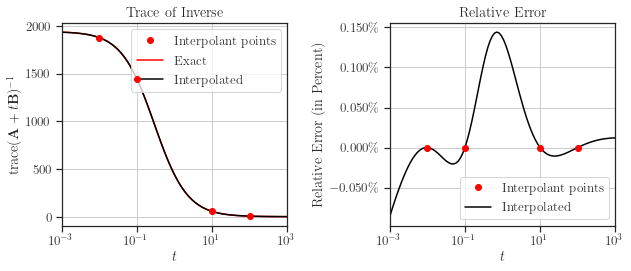

In [24]:
Trace2 = RMBF.Interpolate(t,CompareWithExact=True,Plot=True)

### Using Rational Polynomial Functions Method

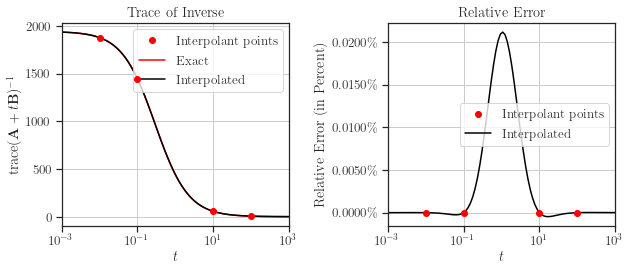

In [13]:
RPF = InterpolateTraceOfInverse(A,B,InterpolantPoints,InterpolationMethod='RPF')
Trace3 = RPF.Interpolate(t,CompareWithExact=True,Plot=True)